## Вариант 14 (2,6)
**Задача №2.**
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. 
Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? 
Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

**Наборы данных:**
6.https://www.kaggle.com/mohansacharya/graduate-admissions (файл Admission_Predict_Ver1.1.csv)

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Загружаем данные
df = pd.read_csv("D:/Загрузки/Admission_Predict_Ver1.1.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Проверка количества пропусков
print("Пропуски до обработки:\n", df.isnull().sum())


Пропуски до обработки:
 Serial_No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64


## Так как в исходном датасете нет пропусков, создадим их искусственно.

In [11]:
# Создаём копию и вносим ИСКУССТВЕННЫЕ ПРОПУСКИ
df_missing = df.copy()

# В 10% случайных строк делаем пропуски в GRE_Score и University_Rating
df_missing.loc[df_missing.sample(frac=0.1, random_state=42).index, 'GRE_Score'] = np.nan
df_missing.loc[df_missing.sample(frac=0.1, random_state=1).index, 'University_Rating'] = np.nan

# Проверка количества пропусков
print("Пропуски до обработки:\n", df_missing.isnull().sum())

Пропуски до обработки:
 Serial_No.            0
GRE_Score            50
TOEFL_Score           0
University_Rating    50
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance_of_Admit       0
dtype: int64


## Визуализация распределения до обработки

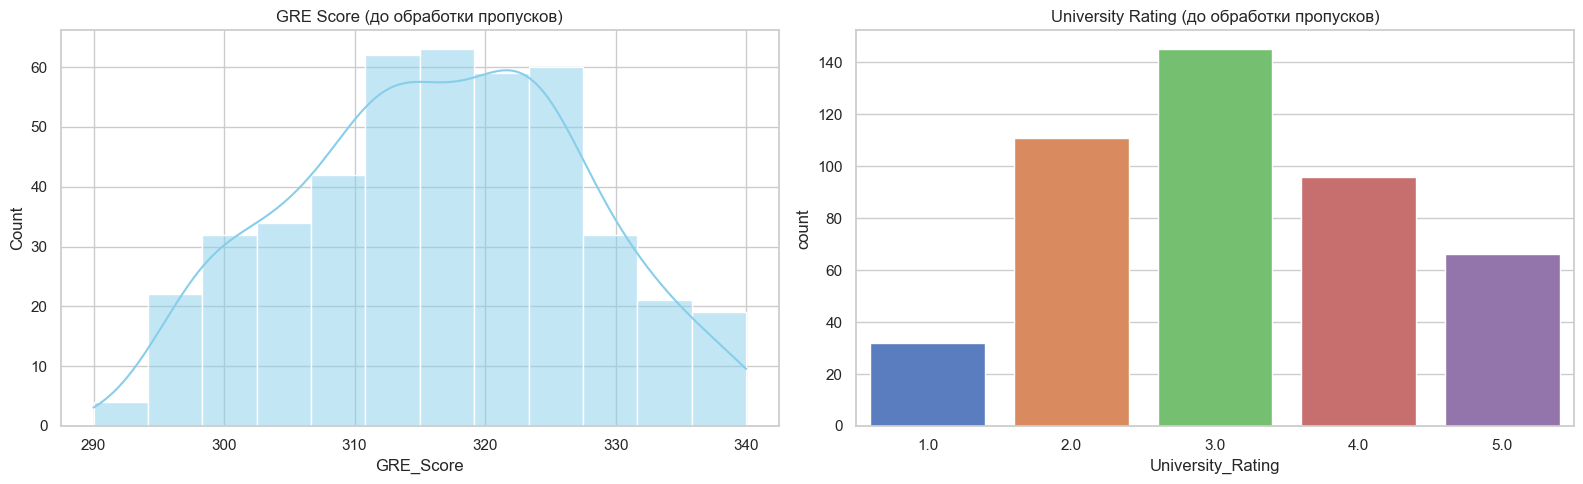

In [12]:
# === Визуализация ДО обработки ===
def visualize_distributions(df, title_suffix="До обработки"):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    sns.histplot(df['GRE_Score'], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"GRE Score ({title_suffix})")

    sns.countplot(x='University_Rating', data=df,
                  hue='University_Rating', palette='muted', legend=False, ax=axes[1])
    axes[1].set_title(f"University Rating ({title_suffix})")

    plt.tight_layout()
    plt.show()

visualize_distributions(df_missing, "до обработки пропусков")

## Обработка пропусков и визуализация
### Количественный признак: 'GRE Score'
Для обработки пропусков в признаке 'GRE Score' (оценка за тест GRE) был использован метод импутации с использованием медианы.
Медиана устойчива к выбросам и подходит для данных с потенциально несимметричным распределением.
Это позволяет сохранить центральную тенденцию данных без значительного искажения их структуры
### Категориальный признак: 'University Rating'
Для обработки пропусков в признаке 'University Rating' (рейтинг университета) был использован метод импутации с использованием моды.
Мода — это наиболее часто встречающееся значение в категориальном признаке, и она является стандартным выбором для заполнения пропусков, когда нет дополнительной информации для более сложных методов

Пропуски после обработки:
 Serial_No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64


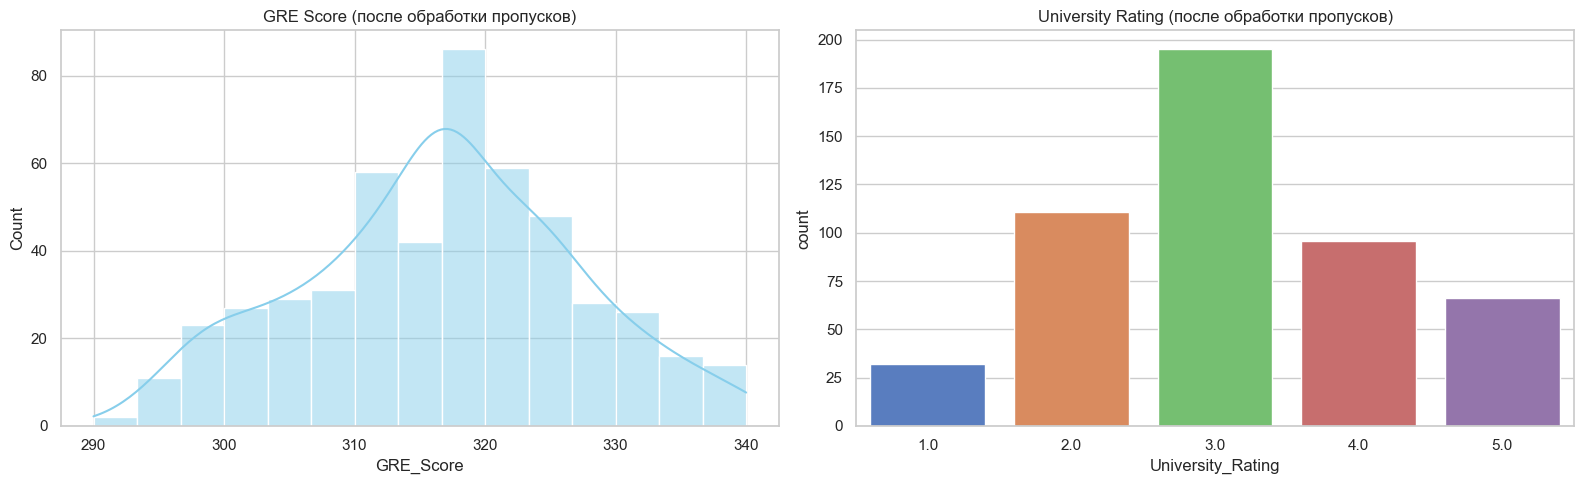

In [14]:
# === Обработка пропусков ===
df_filled = df_missing.copy()

df_filled = df_filled.fillna({
    'GRE_Score': df_filled['GRE_Score'].median(),
    'University_Rating': df_filled['University_Rating'].mode()[0]
})

# Проверка после обработки
print("Пропуски после обработки:\n", df_filled.isnull().sum())

# === Визуализация ПОСЛЕ ===
visualize_distributions(df_filled, "после обработки пропусков")

## Выбор признаков для модели
Оставляем следующие признаки:

- GRE Score
- TOEFL Score
- University Rating
- SOP
- LOR
- CGPA
- Research

Все признаки могут влиять на вероятность поступления.  
Research — бинарный категориальный, важно учитывать для вероятности поступления в магистратуру.  
GRE, TOEFL, CGPA — ключевые метрики при поступлении.  
University Rating, SOP, LOR — менее объективны, но всё равно используются

In [15]:
df.describe()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Построим гистограмму для признака TOEFL_Score

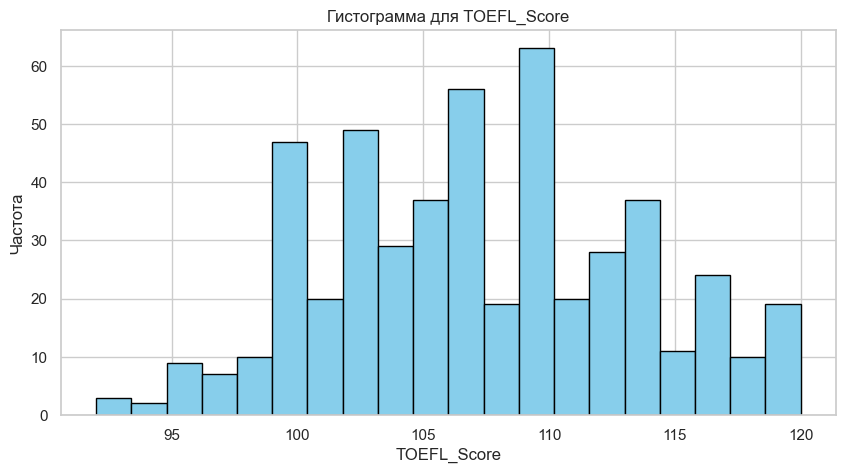

In [17]:
plt.hist(df['TOEFL_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Гистограмма для TOEFL_Score')
plt.xlabel('TOEFL_Score')
plt.ylabel('Частота')
plt.show()